# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


In [129]:
import csv                            # import csv module to read the data

sat_file = 'assets/sat_scores.csv' # set filepath

##### 1. What does the data describe?

The data is comprised of four categories: State, Rate, Verbal, and Math. The state reflects the name of the state reporting the data, the rate being the participation of students in taking the SAT, and the Verbal and Math scores reflect the average that students obtained in both of those categories respectively.

Assumptions about the data are listed below, along with questions about the methodology of the data collection and presentation for analysis.

##### 2. Does the data look complete? Are there any obvious issues with the observations?

If the goal is only to explore a broad state by state comparision of the SAT score, the the data is acceptable. There are no pieces of missing data

There are a few issues with the data:
* The SAT just changed it's format a few years ago, is this data from the current 1600 point exam or the previous 2400 point exam? 
* Who disclosed the data?
    * Did local schools have a choice? Then bad scores could have been left out
    * Was it College Prep? They may want it to look like scores are lower than they are to make students feel better
    * Was it through a third party? Do they have any biases they could have put onto the data?
* Since the test is optional it cannot be used as it currently is to compare one state's result against another's.
* How is participation rate determined?
    * Is it number of all qualified students who did or did not take the exam?
        * Does it include adult population outside of high school? How is that qualified?
    * Do states with higher participation have higher incentives for taking the SAT? 
    * Does rate exclude individuals who did not take the exam due to developmental disabilities?
    * Are students who are ahead/behind their grade included/excluded in the participation rate, respectively?
    * In creation of the averages did it include scores for people who missed the exam? How were they recorded/discarded

##### 3. Create a data dictionary for the dataset.

In [130]:
sat_data = {}

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [131]:
sat_scores_raw =[]                   # Create empty 'base' list

with open(sat_file, 'r') as sat:     # Open data as a readable
    reader_sat = csv.reader(sat)     # Use csv package to convert the data from csv to list
    for row in reader_sat:           # New rows defined by following a '\n'
        sat_scores_raw.append(row)   # Append each row to the 'base' list

##### 5. Print the data

In [132]:
# Make the data a little more presentable by having each row on a new line
# Done through a for loop, iterating over the lists in the list and printing one per line



count = 0
for item in sat_scores_raw: 
    while count < 5:
        print item 
        count += 1

['State', 'Rate', 'Verbal', 'Math']
['State', 'Rate', 'Verbal', 'Math']
['State', 'Rate', 'Verbal', 'Math']
['State', 'Rate', 'Verbal', 'Math']
['State', 'Rate', 'Verbal', 'Math']


##### 6. Extract a list of the labels from the data, and remove them from the data.

In [133]:
labels = sat_scores_raw[0]       # The labels were found in the first list from the list of lists
sat_scores = sat_scores_raw[1:]  # All needed data was found to follow that list of labels

print "Labels: ", labels, '\n'   # Check to make sure that all labels appear

print "Scores: "
for scr in sat_scores[:5]:       # Print first five data rows to see if anything was lost
    print scr

Labels:  ['State', 'Rate', 'Verbal', 'Math'] 

Scores: 
['CT', '82', '509', '510']
['NJ', '81', '499', '513']
['MA', '79', '511', '515']
['NY', '77', '495', '505']
['NH', '72', '520', '516']


In [134]:
def cat_dict_maker(labels, scores):
    """Makes a dictionary with the items in labels as keys and the list of scores as values"""

    for i, label in enumerate(labels): # Enumerate the list of labels, loop over each item in labels
        col = []                       # Create empty list to be used to store values for the dict
        for row in scores:             # Iterate through the rows in the data list
            cell = row[i]              # Select item from row that has same index as the header
            col.append(cell)           # Append the cell to list of other values associated with the header

        sat_data[label] = col          # Set label as key list of associated values as it's value

    return sat_data                    # Return the dictionary

In [135]:
sat_data = cat_dict_maker(labels, sat_scores) # 

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

*Should this be an union list?* 

In [136]:
sts = sat_data['State']

st_list = []
for st in sts:
    if (st != "All"):
        st_list.append(st)
        
st_list = sorted(st_list)

##### 8. Print the types of each column

In [137]:
def type_finder(data_dict):
    """ data_dict=dictionary, used to determine datatypes of the data associated to label """
    for key in data_dict:                          # Go through each key in the dictionary
        for i, val in enumerate(data_dict[key]):   # Values of dict are lists, use to enumerate list
            if i == 0:                             # If the first item of a list
                print key, type(val)               # Print the label and the type of data for first item of list

In [138]:
type_finder(sat_data)

Math <type 'str'>
State <type 'str'>
Rate <type 'str'>
Verbal <type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [139]:
for key in sat_data:                                # Iterate over keys in sat_data
        if key == 'State':                          # If key is state:
            sat_data[key] = sat_data[key]           # Keep values in list as strings
        else:                                       # Otherwise:
            sat_data[key] = map(int, sat_data[key]) # Map the values in the list to integers from strings
            
type_finder(sat_data) # Check work, should see three ints and one str. Can additionally print to see

Math <type 'int'>
State <type 'str'>
Rate <type 'int'>
Verbal <type 'int'>


##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 
##### 11. Create a dictionary with the values for each of the numeric columns

Both done together

In [140]:
st_scores_dict = {}

for i, state in enumerate(sat_data['State']):       # Enumerate over the list kept in the 'State' key
    state_values = {}                               # Create empty dictionary to store values of each category
    state_values['Math'] = sat_data['Math'][i]      # Set the key of empty dict to state, and value to math score of the state
    state_values['Verbal'] = sat_data['Verbal'][i]  # Repeat above for verbal score
    state_values['Rate'] = sat_data['Rate'][i]      # Repeat above for Rate
    st_scores_dict[state] = state_values

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [141]:
for key in sat_data:
    if key != 'State':
        print "For", key, "Max Value is:", max(sat_data[key]), '\n', \
        "For", key, "Min Value is:", min(sat_data[key])

For Math Max Value is: 603 
For Math Min Value is: 439
For Rate Max Value is: 82 
For Rate Min Value is: 4
For Verbal Max Value is: 593 
For Verbal Min Value is: 482


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [142]:
import numpy as np                                       # import numpy

def std_dev(d_and_key):
    """ Finds standard deviation for value of dictionary"""
    val_mean = np.mean(d_and_key)                        # Find mean of the list
    stdev = np.sqrt(                                       # Square root of the variance
        np.mean(                                         # Take the average of below
            [(val - val_mean) ** 2 for val in d_and_key] # Square difference between data point and mean
        )
    )
    return stdev 

In [143]:
# Using List Comprehension
for key in sat_data:
    if key != 'State':
        print "Standard Deviation for", key, "is: ", std_dev(sat_data[key])

Standard Deviation for Math is:  35.6669961643
Standard Deviation for Rate is:  27.0379964945
Standard Deviation for Verbal is:  32.9150949616


In [144]:
# Using Numpy
for key in sat_data:
    if key != 'State':
        print "Standard Deviation for", key, "is: ", np.std(sat_data[key])

Standard Deviation for Math is:  35.6669961643
Standard Deviation for Rate is:  27.0379964945
Standard Deviation for Verbal is:  32.9150949616


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

In [145]:
"""Import awesome plotting libraries!"""

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
import numpy as np
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

sns.set_style("white") # Make Dave happy by making the graphs clean


%matplotlib inline

In [147]:
%%bash
ls

Tableau Workbook.twb
assets
project_1.ipynb


In [148]:
sat_file_modified = 'assets/sat_scores_modified.csv' 
# Removed the 'All' row, so that it would not be affect graphs

In [149]:
sat = pd.read_csv(sat_file_modified) # Convert SAT scores into a panda dataframe


sat.head()                  # Print the head to make sure everything went according to plan

,State,Rate,Verbal,Math,Country
0,CT,82,509,510,USA
1,NJ,81,499,513,USA
2,MA,79,511,515,USA
3,NY,77,495,505,USA
4,NH,72,520,516,USA


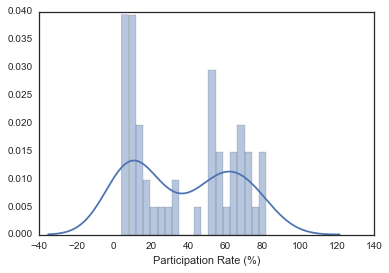

In [150]:
rate = sat.Rate.values

sns.distplot(rate, bins = 20, axlabel="Participation Rate (%)") 
                              # bin of twenty was chosen
                              # difference of freqency in bins between first and second peaks
                              # More dramatic than others and can show that first peak is the mode

##### 15. Plot the Math distribution

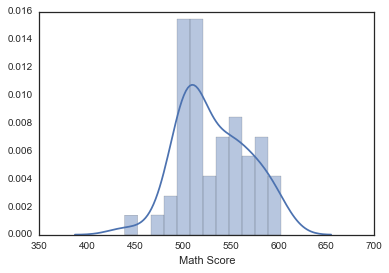

In [151]:
# For math and verbal a bin size of twelve was chosen. 
# It shows the basis of the distribution while not being too granular
math = sat.Math.values

sns.distplot(math, bins = 12,axlabel="Math Score")

##### 16. Plot the Verbal distribution

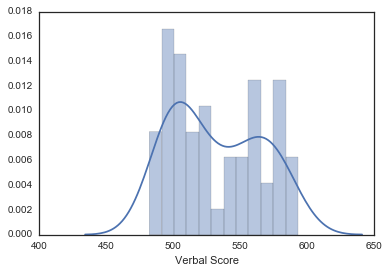

In [152]:
verbal = sat.Verbal.values

v_dist = sns.distplot(verbal, bins = 12, axlabel='Verbal Score')


##### 17. What is the typical assumption for data distribution?

The typical assumption for data distribution is that it is a normal, unimodal distribution ( mean = median = mode )

[Mordkoff](http://www2.psychology.uiowa.edu/faculty/mordkoff/GradStats/part%201/I.07%20normal.pdf)  
[BioStats](http://library.med.utah.edu/WebPath/TUTORIAL/BIOSTATS/BIOSTATS.html)  
[NIST](http://www.itl.nist.gov/div898/handbook/prc/section1/prc12.htm)  

##### 18. Does that distribution hold true for our data?

This does *not* hold true for our data. The rate almost looks to be a bimodal distribution. With a mean inbetween the two peaks present.  
Both the verbal and math scores have distributions that are positively skewed. 

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

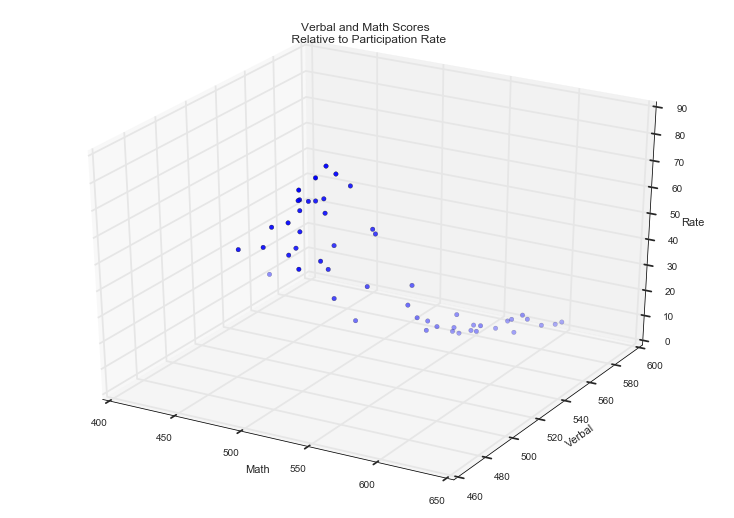

In [153]:

fig = plt.figure() # Create Figure
ax = Axes3D(fig)   # Create 3D axes

ax.scatter(math, verbal, rate, c='b', marker='o') # Scatter plot with 

plt.title('Verbal and Math Scores \n Relative to Participation Rate')

# Set Labels
ax.set_xlabel('Math')
ax.set_ylabel('Verbal')
ax.set_zlabel('Rate')


fig.set_size_inches((10,7)) # Increase plot size
plt.show()                  # Show Plot

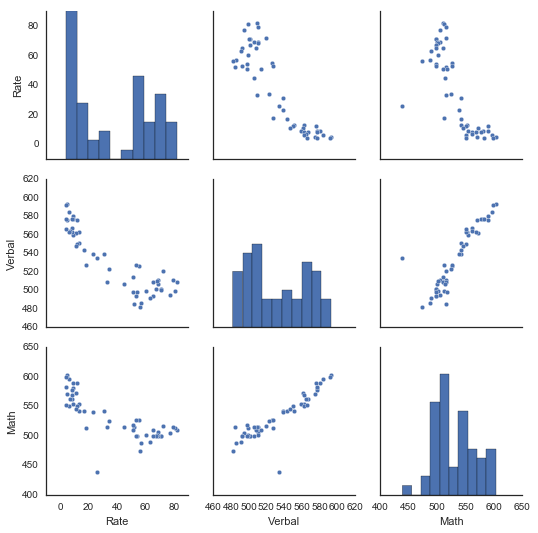

In [154]:
sat_pairplot = sns.pairplot(sat)

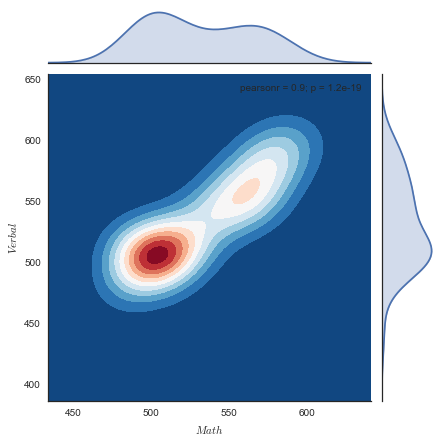

In [155]:
verbal, rate

vr_data = sns.jointplot(verbal, math, kind="kde", cmap="RdBu_r")  # Create a Kernel Density Estimation
vr_data.set_axis_labels("$Math$", "$Verbal$");                    # Set the axis labels

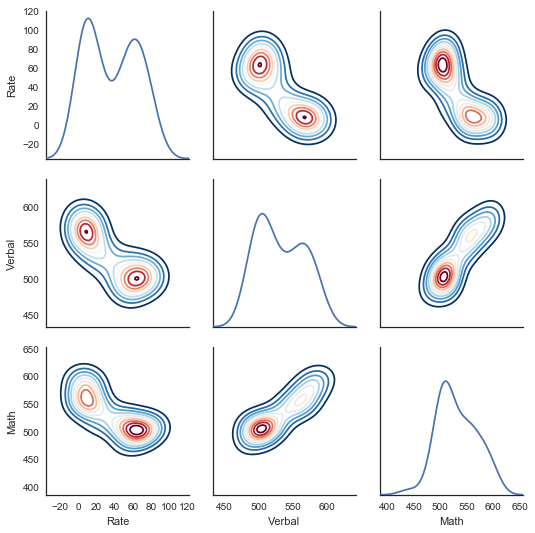

In [156]:
sat_pairgrid = sns.PairGrid(sat)
sat_pairgrid.map_diag(sns.kdeplot)
sat_pairgrid.map_offdiag(sns.kdeplot, cmap="RdBu_r")

##### 20. Are there any interesting relationships to note?

For increasing participation rate there is a decrease in the scores for both the math and verbal sections of the exam. 

Using the kernel density maps, it can even be seen that areas with low participation have greater scores in both sections of the exam. 

##### 21. Create box plots for each variable. 

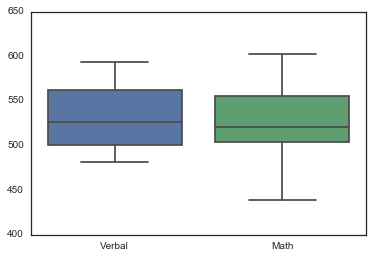

In [157]:
# Use this to map rate 
sat_vr = sat[sat.columns[2:]]
sns.boxplot(sat_vr)

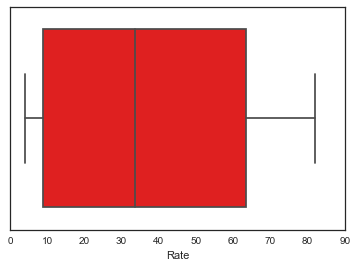

In [158]:
ax = sns.boxplot(x=sat['Rate'],color='Red')

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

Made sure that the colors of the heat maps reflected the colors of the box plot above for easier reference

## Verbal Heat Map:
![](https://snag.gy/EKfuH1)
## Math Heat Map:  
![](https://snag.gy/w6K1MF)
## Rate Heat Map:  
![](https://snag.gy/4r5bXW)

## Future Goals

* Consolidate functions as classes
* Create 3D visualization of the KDE
* Do plots in plotly
* Figure python way to remove the "All row before graphing everything"